In [1]:
import math
import meep as mp
from meep import mpb

geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, 1),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)

kz = 0

k_points = [
    mp.Vector3(z=kz),  # Gamma
    mp.Vector3(0, 0.5, kz),  # M
    mp.Vector3(1 / -3, 1 / 3, kz),  # K
    mp.Vector3(z=kz),  # Gamma
]

k_interp = 4
k_points = mp.interpolate(k_interp, k_points)

eps = 13  # the dielectric constant of the background
r = 0.48  # the hole radius

default_material = mp.Medium(epsilon=eps)
geometry = [mp.Cylinder(r, material=mp.air)]



resolution = 32
num_bands = 8

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    default_material=default_material,
    resolution=resolution,
    num_bands=num_bands,
)

ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.48, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 3 and 16 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Ve

/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


    linmin: converged after 4 iterations.
    switching to approximate line minimization (decrease time by 56.0714%)
    iteration    9: trace = 3.592206005966021 (0.0673087% change)
    switching back to exact line minimization
    iteration   10: trace = 3.591427933516561 (0.0216624% change)
    linmin: converged after 3 iterations.
    iteration   11: trace = 3.591299002851158 (0.00359002% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 3.591262784545455 (0.00100851% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 75.4318%)
    iteration   13: trace = 3.591252778251502 (0.000278629% change)
    switching back to exact line minimization
    iteration   14: trace = 3.591250288792944 (6.93201e-05% change)
    linmin: converged after 2 iterations.
    iteration   15: trace = 3.591249483819921 (2.24148e-05% change)
    linmin: converged after 2 iterations.
    iteration   16: trace = 3.591249

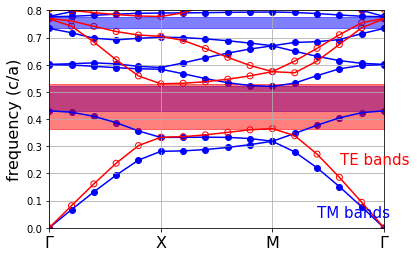

In [6]:
import matplotlib.pyplot as plt
import numpy as np 


fig, ax = plt.subplots()
x = range(len(tm_freqs))

for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([0, 0.8])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.5)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.5)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()